In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [8]:
x_train.shape

(50000, 32, 32, 3)

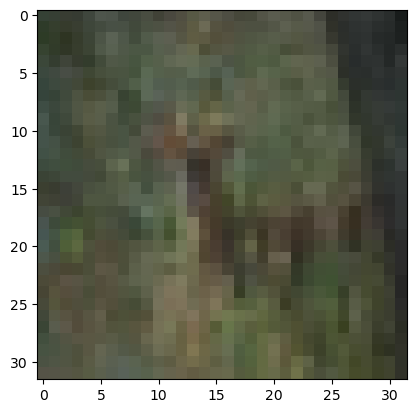

In [9]:
plt.imshow(x_train[10])

In [10]:
add_noise=True
noise_factor=0.2

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/225.0

x_train_noise=x_train.copy()
x_test_noise=x_test.copy()

if add_noise:
    x_train_noise=x_train_noise + noise_factor*np.random.normal(0.0, 1.0, size=x_train.shape)
    x_test_noise=x_test_noise+noise_factor*np.random.normal(0.0, 1.0, size=x_test.shape)

    x_train_noise=np.clip(x_train_noise,0.0,1.0)
    x_test_noise=np.clip(x_test_noise,0.0,1.0)

# CONVOLUTION

In [11]:
from tensorflow.keras import models, layers

autoencoder = models.Sequential([
    # Encoder
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2), padding="same"),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2), padding="same"),

    # Decoder    
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.UpSampling2D((2,2)),

    layers.Conv2D(3, (3,3), activation="sigmoid", padding="same")
])


C:\Anaconda_Jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,419 (298.51 KB)

 Trainable params: 76,035 (297.01 KB)

 Non-trainable params: 384 (1.50 KB)

In [14]:
from tensorflow.keras.optimizers import Adam

autoencoder.compile(optimizer=Adam(learning_rate=0.001),loss="mse")

In [16]:
history=autoencoder.fit(
    x=x_train_noise,y=x_train,
    batch_size=100,
    epochs=3,
    shuffle=True,
    validation_data=(x_test_noise,x_test)
)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 148ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - loss: 0.0056 - val_loss: 0.0069
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 73s 145ms/step - loss: 0.0052 - val_loss: 0.0067


In [17]:
print(autoencoder.evaluate(x_test_noise,x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0067
0.006654174067080021


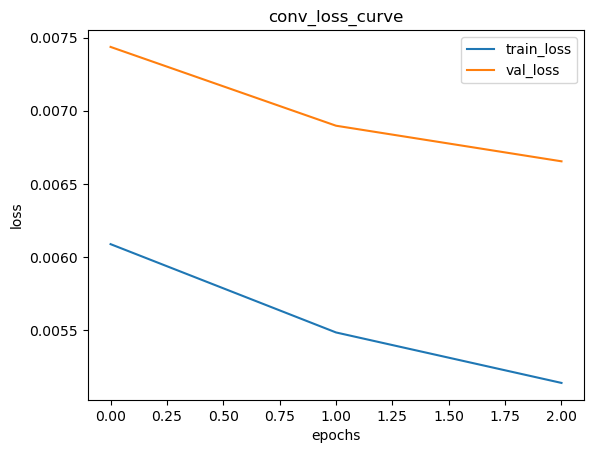

In [18]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("conv_loss_curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# mlp

In [20]:
from tensorflow.keras import models, layers

autoencoder2 = models.Sequential([
    layers.InputLayer(input_shape=(32, 32, 3)),  # Input layer
    
    layers.Flatten(),  # Flatten the input image
    
    layers.Dense(512, activation="relu"),  # Encoder layer 1
    layers.Dense(256, activation="relu"),  # Encoder layer 2
    
    layers.Dense(512, activation="relu"),  # Decoder layer 1
    layers.Dense(32*32*3, activation="sigmoid"),  # Output layer
    
    layers.Reshape((32, 32, 3))  # Reshape back to image shape
])


In [21]:
autoencoder2.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
# earlystop=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
history2=autoencoder2.fit(
    x_train_noise,x_train,
    batch_size=100,
    epochs=3,
    validation_data=(x_test_noise,x_test)
)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - loss: 0.0372 - val_loss: 0.0240
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0162 - val_loss: 0.0188
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0136 - val_loss: 0.0173


In [24]:
autoencoder2.evaluate(x_test_noise,x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0173


0.017282817512750626

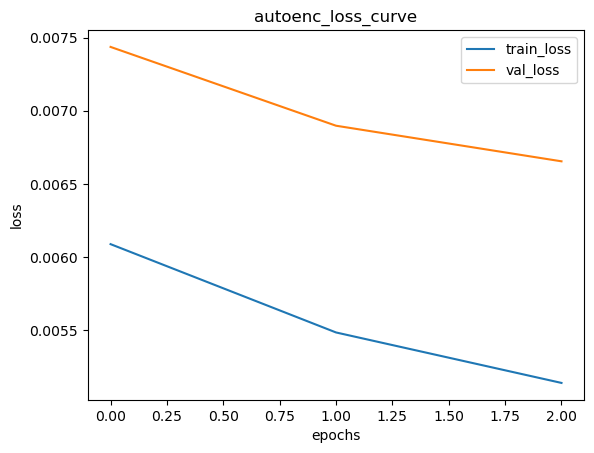

In [25]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("autoenc_loss_curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()